In [533]:
# 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

### EDA

In [534]:
# 2. Loading the data into the DataFrame
df = pd.read_csv("../data/data_for_EDA.csv", index_col=0)
# Display the top 5 rows 
df.head()

,name,price,rating,distance,latitude,longitude,bikes_available
0,Coffee & Whisky House,3.0,8.8,657,53.011939,18.611414,5
1,Coffee & Whisky House,3.0,8.8,603,53.012029,18.596202,6
2,Coffee & Whisky House,3.0,8.8,229,53.009622,18.600228,4
3,Coffee & Whisky House,3.0,8.8,211,53.007485,18.600735,6
4,Coffee & Whisky House,3.0,8.8,832,53.015745,18.607203,9


In [535]:
# 3. Checking the types of data
df.dtypes

name                object
price              float64
rating             float64
distance             int64
latitude           float64
longitude          float64
bikes_available      int64
dtype: object

In [536]:
df.describe()

,price,rating,distance,latitude,longitude,bikes_available
count,441.000000,410.000000,731.000000,731.000000,731.000000,731.000000
mean,1.537415,5.432439,544.838577,53.019887,18.608653,6.287278
std,0.690245,1.940634,795.464264,0.012190,0.029322,1.550816
min,1.000000,1.000000,6.000000,52.992563,18.518344,2.000000
25%,1.000000,4.000000,244.000000,53.012702,18.591969,5.000000
50%,1.000000,5.000000,480.000000,53.019033,18.601746,6.000000
75%,2.000000,7.200000,742.000000,53.025994,18.619199,7.000000
max,4.000000,8.800000,14936.000000,53.055472,18.701141,9.000000


In [537]:
# 4. Dropping irrelevant columns
df = df.drop(columns=['name', 'latitude', 'longitude'], axis=1)
df.head()

,price,rating,distance,bikes_available
0,3.0,8.8,657,5
1,3.0,8.8,603,6
2,3.0,8.8,229,4
3,3.0,8.8,211,6
4,3.0,8.8,832,9


In [538]:
# 5. Renaming the columns
# df = df.rename(columns={"Column_Name": "New_Name"})
# df.head()

In [539]:
# 6. Dropping the duplicate rows
print(f'DataFrame before dropping duplicates {df.shape}')
duplicates_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicates_df.shape)
# Count the number of rows
print('Count of rows:\n', df.count())
df = df.drop_duplicates()
df.head()

DataFrame before dropping duplicates (731, 4)
Number of duplicate rows: (5, 4)
Count of rows:
 price              441
rating             410
distance           731
bikes_available    731
dtype: int64


,price,rating,distance,bikes_available
0,3.0,8.8,657,5
1,3.0,8.8,603,6
2,3.0,8.8,229,4
3,3.0,8.8,211,6
4,3.0,8.8,832,9


In [540]:
print('Count of rows:\n', df.count())

Count of rows:
 price              439
rating             409
distance           726
bikes_available    726
dtype: int64


In [541]:
# 7. Dropping the missing or null values
print('Count of rows:\n', df.count())

Count of rows:
 price              439
rating             409
distance           726
bikes_available    726
dtype: int64


In [542]:
# Dropping the missing values.
df = df.dropna()
print(df.count())
# After dropping the values
print('Count of nulls:\n', df.isnull().sum())

price              254
rating             254
distance           254
bikes_available    254
dtype: int64
Count of nulls:
 price              0
rating             0
distance           0
bikes_available    0
dtype: int64


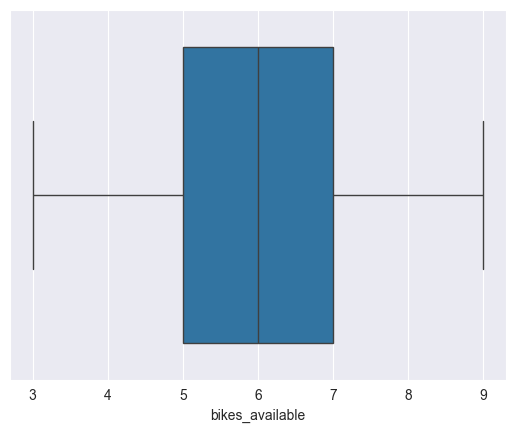

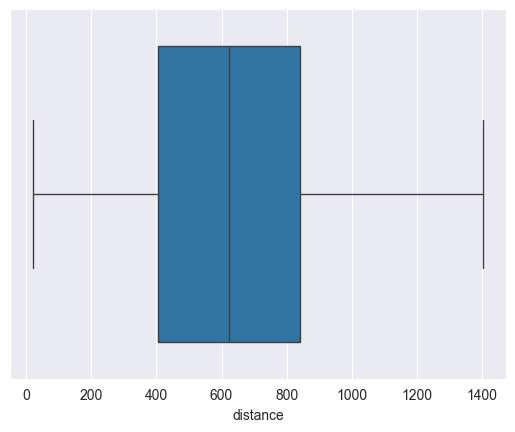

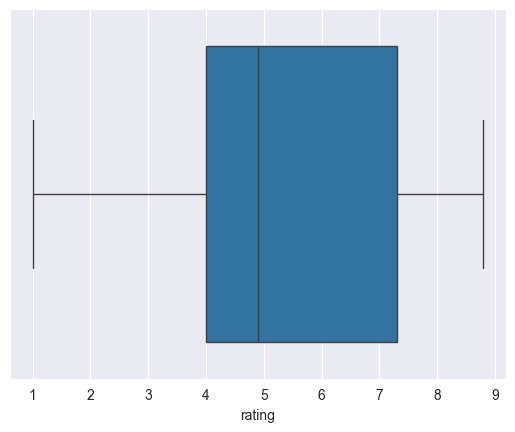

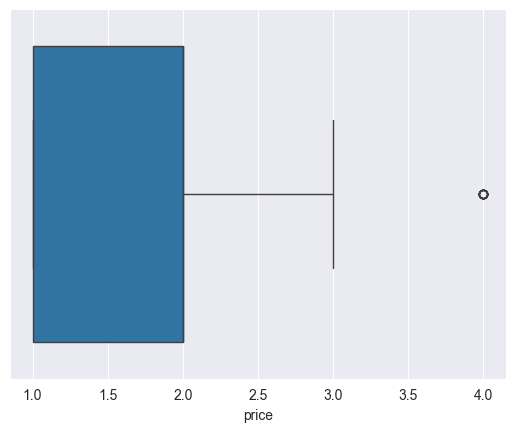

In [543]:
# 8. Detecting Outliers
sns.boxplot(x=df['bikes_available'])
plt.show()
sns.boxplot(x=df['distance'])
plt.show()
sns.boxplot(x=df['rating'])
plt.show()
sns.boxplot(x=df['price'])
plt.show()

In [544]:
# Standard Deviation
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR:\n', IQR)

IQR:
 price                1.00
rating               3.30
distance           435.25
bikes_available      2.00
dtype: float64


In [545]:
# Remove outliers 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'DataFrame after dropping outliers {df.shape}')

DataFrame after dropping outliers (244, 4)


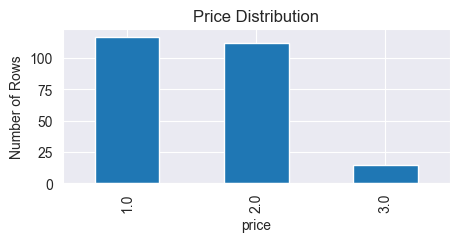

In [546]:
# 9. Plot different features against one another (scatter), 
# against frequency (histogram)
df['price'].value_counts().plot(kind='bar', figsize=(5, 2))
plt.title("Price Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('price');

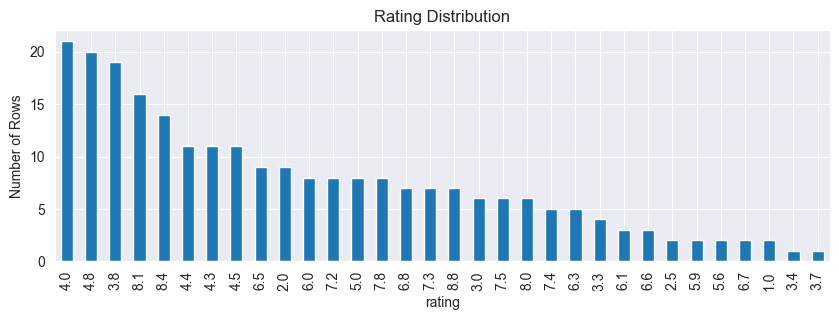

In [547]:
df['rating'].value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("Rating Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('rating');

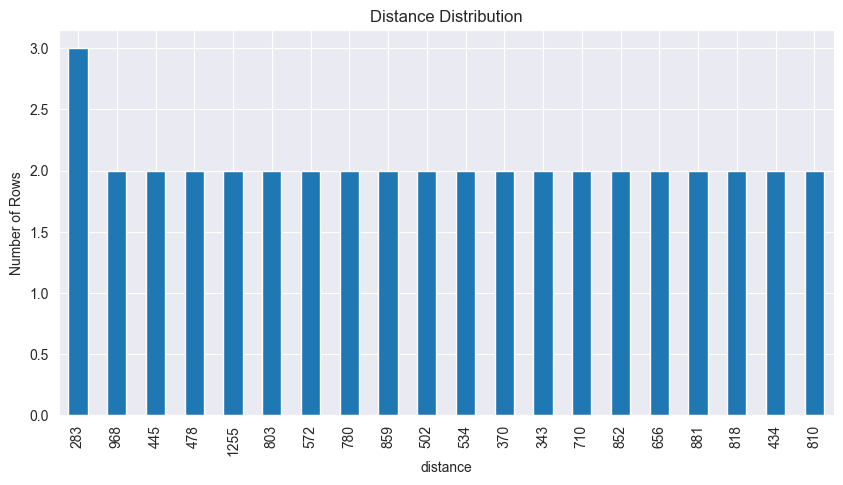

In [548]:
df['distance'].value_counts().nlargest(20).plot(kind='bar', figsize=(10, 5))
plt.title("Distance Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('distance');

                    price    rating  distance  bikes_available
price            1.000000 -0.056105  0.099061         0.002167
rating          -0.056105  1.000000 -0.103503        -0.010044
distance         0.099061 -0.103503  1.000000         0.075917
bikes_available  0.002167 -0.010044  0.075917         1.000000


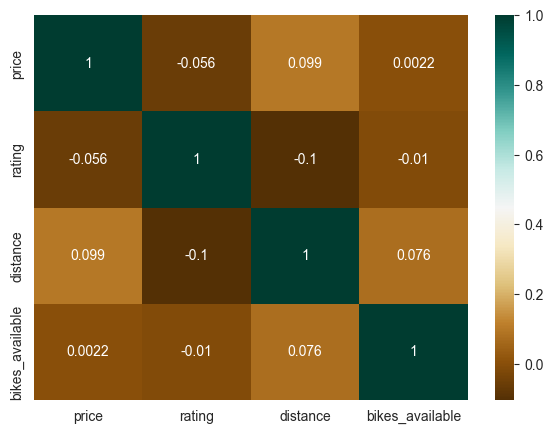

In [549]:
# Heat Maps
plt.figure(figsize=(7, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
print(c)


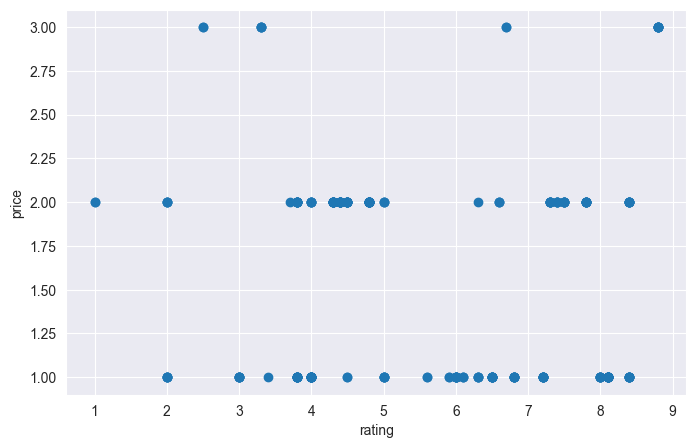

In [550]:
# Scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['rating'], df['price'])
ax.set_xlabel('rating')
ax.set_ylabel('price')
plt.show()

### Build a regression model.

In [551]:
# Example: Adding a constant column for regression analysis
df = sm.add_constant(df)
# Display the first few rows
# pri nt(dat.head())

Provide model output and an interpretation of the results. 

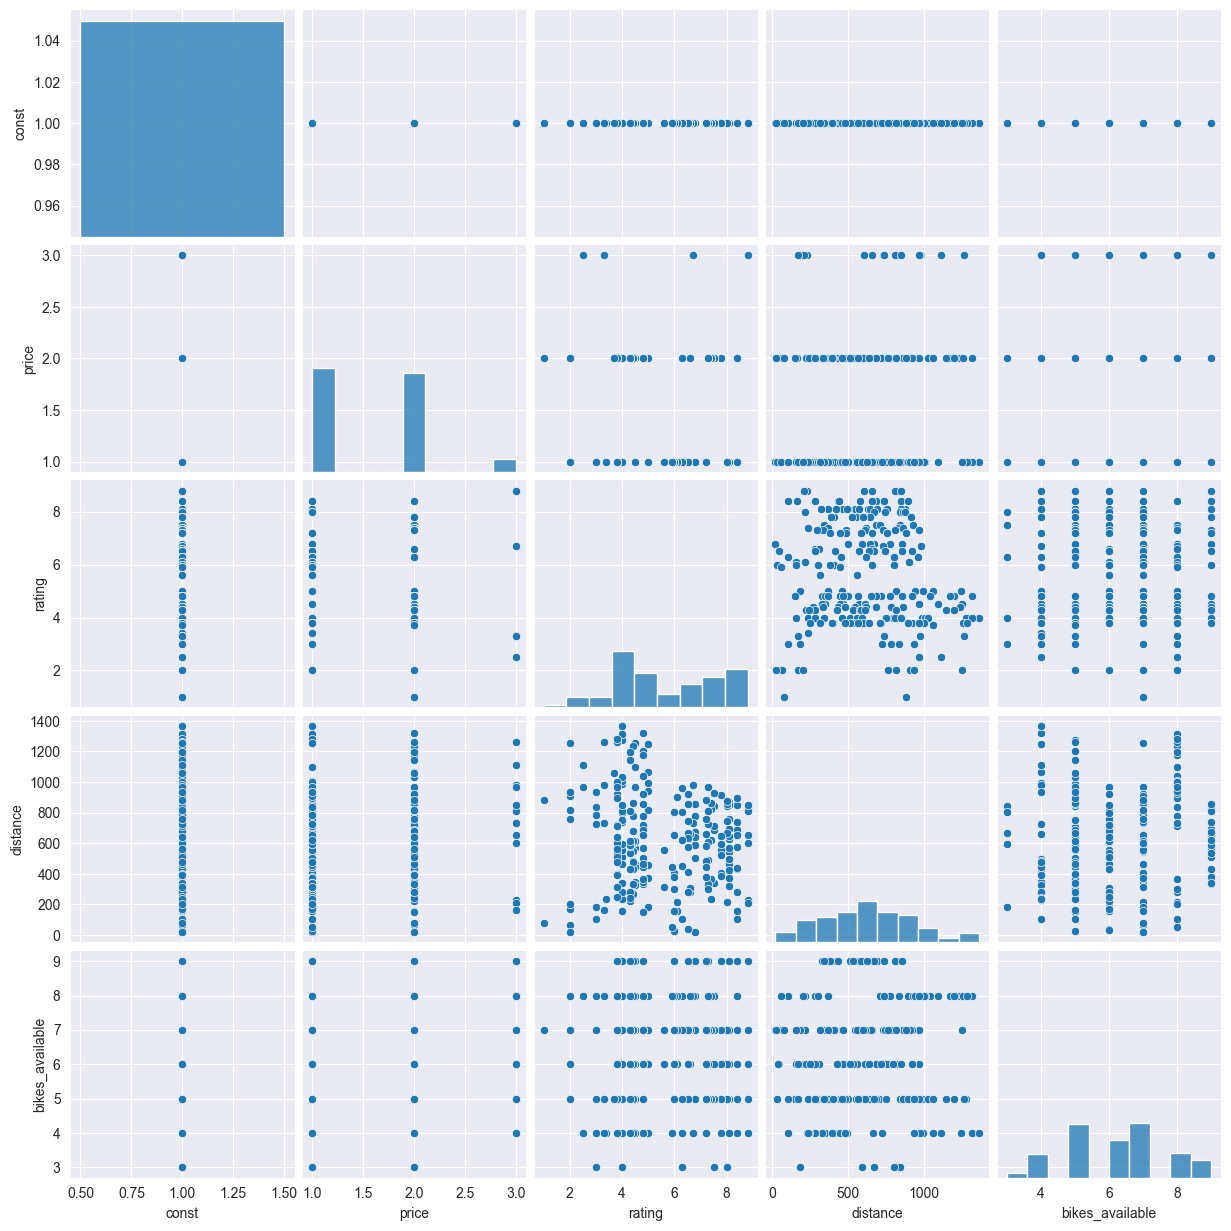

In [552]:
sns.pairplot(data=df)
plt.show()

In [553]:
df.corr(numeric_only=True)

,const,price,rating,distance,bikes_available
const,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,-0.056105,0.099061,0.002167
rating,NaN,-0.056105,1.000000,-0.103503,-0.010044
distance,NaN,0.099061,-0.103503,1.000000,0.075917
bikes_available,NaN,0.002167,-0.010044,0.075917,1.000000


In [554]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['price'], df['rating'])
stat, p2 = scipy.stats.pearsonr(df['price'], df['distance'])
stat, p3 = scipy.stats.pearsonr(df['rating'], df['distance'])
print(p1, p2, p3)

0.38289068473178806 0.12277254908178974 0.10678940451167128


In [555]:
# Add a constant for the intercept
X = df[['price', 'rating', 'distance']]
X = sm.add_constant(X)  # Adds the intercept term
y = df['distance']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.713e+31
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:34:03   Log-Likelihood:                 6623.7
No. Observations:                 244   AIC:                        -1.324e+04
Df Residuals:                     240   BIC:                        -1.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.253e-13   1.19e-13      5.261      0.0

# Stretch

### How can you turn the regression model into a classification model?

#### To transform the regression problem into a classification problem, we change the nature of the dependent variable. Instead of predicting a continuous value (number of bikes), we classify the locations into discrete categories (e.g., low, medium, or high bike availability).

In [556]:
df['price_range'] = pd.cut(
    df['price'],
    bins=[0, 1, 2, float('inf')],
    labels=['Low', 'Medium', 'High']
)
df

,const,price,rating,distance,bikes_available,price_range
0,1.0,3.0,8.8,657,5,High
1,1.0,3.0,8.8,603,6,High
2,1.0,3.0,8.8,229,4,High
3,1.0,3.0,8.8,211,6,High
4,1.0,3.0,8.8,832,9,High
...,...,...,...,...,...,...
720,1.0,2.0,2.0,761,7,Medium
721,1.0,1.0,2.0,1255,7,Low
722,1.0,2.0,2.0,818,7,Medium
725,1.0,2.0,1.0,79,7,Medium


In [557]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = df[['price', 'rating', 'distance']]
y = df['price_range'].cat.codes  # Convert categories to numeric codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

